In [1]:
#Importing yfinance library to recieve api
import yfinance as yf
import pandas as pd 
import os

In [2]:
#Defining ticker name and period of those stocks we want fetch the data
ticker="TSLA"
start_date="2015-01-01"
end_date="2025-03-01"

#Downloading the data from website`
data=yf.download(ticker,start=start_date,end=end_date)
print(data)


C:\Users\shres\AppData\Local\Temp\ipykernel_6204\1205985940.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start=start_date,end=end_date)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2015-01-02   14.620667   14.883333   14.217333   14.858000   71466000
2015-01-05   14.006000   14.433333   13.810667   14.303333   80527500
2015-01-06   14.085333   14.280000   13.614000   14.004000   93928500
2015-01-07   14.063333   14.318667   13.985333   14.223333   44526000
2015-01-08   14.041333   14.253333   14.000667   14.187333   51637500
...                ...         ...         ...         ...        ...
2025-02-24  330.529999  342.399994  324.700012  338.140015   76052300
2025-02-25  302.799988  328.890015  297.250000  327.019989  134228800
2025-02-26  290.799988  309.000000  288.040009  303.709991  100118300
2025-02-27  281.950012  297.230011  280.880005  291.160004  101748200
2025-02-28  292.980011  293.880005  273.600006  279.500000  115697000

[2555 rows x 5 colu

In [3]:
#Converting given data in array into dataframe
dataset=pd.DataFrame(data)

In [4]:
dataset.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [5]:
#Converting m
dataset.columns = dataset.columns.droplevel(1)
dataset = dataset.reset_index()

In [6]:
dataset.head()

Price,Date,Close,High,Low,Open,Volume
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [7]:
dataset.columns = [col.replace('Price ', '') for col in dataset.columns]

In [8]:
dataset.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [9]:
import plotly.graph_objects as go

In [10]:
#Creating candle stick figure
fig = go.Figure(data=[go.Candlestick(
    x=dataset['Date'],  
    open=dataset['Open'],
    high=dataset['High'],
    low=dataset['Low'],
    close=dataset['Close']
)])
#Customize the chart layout
fig.update_layout(title='Stock Price chart TSLA',yaxis_title='Price $',xaxis_rangeslider_visible=False)


#Display the chart
fig.show()

<Axes: >

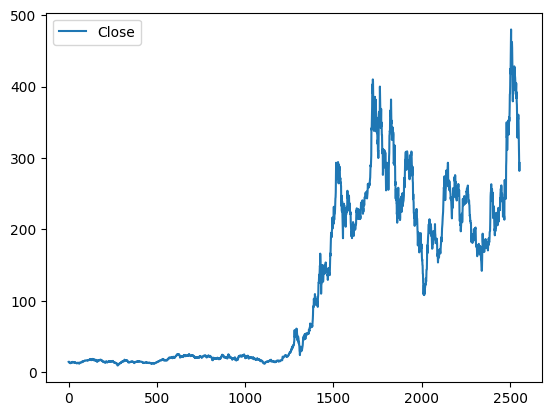

In [11]:
#presenting graph for single parameter(Close)
dataset.plot.line(y="Close",use_index=True)

In [12]:
dataset.reset_index(drop=True,inplace=True)

In [13]:
#Importing the neccessary library
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
x=dataset[['Open','Close','High','Low','Volume']]
y=dataset['Close']

#Seperating test and train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
#Using RandomForestRegressor algorithm to build model
rf=RandomForestRegressor(n_estimators=100,random_state=42)

#Train the model
rf.fit(x_train,y_train)

#Predicting the value through model
y_pred=rf.predict(x_test)

#Testing Efficiency of model using mean square error 
mean=mean_squared_error(y_test,y_pred)
print("Mean square error:",mean)

Mean square error: 0.3371555726817194
